In [ ]:
pip install geopandas

In [ ]:
pip install rasterio

In [ ]:
pip install elapid

In [ ]:
import numpy as np
import rasterio as rio # # Reading, Writing, and Manipulating Raster Geospatial Data
from IPython.display import clear_output
import matplotlib.pyplot as plt #data visualization
import geopandas as gpd #for Geospatial Data, specifically Vector Data and other formats such as shapefiles, GeoJSON & Geopackage files
import rasterio.plot as rioplot
import ipywidgets as widgets  # To use HTML Interactive Widgets
import os #load the data
import elapid as ela
from sklearn import metrics # For Evaluation Metrics (To assess the performance)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Open the temperature dataset
temperature_dataset = rio.open('/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_1_Annual_mean_Temperature_WC_1970_2000.tif')

# Open the precipitation dataset
precipitation_dataset = rio.open('/content/drive/MyDrive/Project_2/Insect Pest/tif files/US_Clip_From_World_Clim/Bio_12_Annual_Precipitation_WC_1970_2000.tif')

In [ ]:
# Read the temperature data into a NumPy array
temperature_data = temperature_dataset.read(1)


In [ ]:
# Read the precipitation data into a NumPy array
precipitation_data = precipitation_dataset.read(1)

In [ ]:
# Define your temperature and precipitation ranges
min_temperature = 10  # Change to your specific value
max_temperature = 30  # Change to your specific value
min_precipitation = 150  # Change to your specific value
max_precipitation = 3500  # Change to your specific value

In [ ]:
# Use the numpy where function to select temperature and precipitation data within the specified ranges
selected_temperature = np.where((temperature_data >= min_temperature) & (temperature_data <= max_temperature), temperature_data, np.nan)
selected_precipitation = np.where((precipitation_data >= min_precipitation) & (precipitation_data <= max_precipitation), precipitation_data, np.nan)

In [ ]:
# Combine the selected temperature and precipitation data
combined_data = selected_temperature + selected_precipitation

In [ ]:
# Define the x-axis and y-axis extent based on the original data
x_min = temperature_dataset.bounds.left
x_max = temperature_dataset.bounds.right
y_min = temperature_dataset.bounds.bottom
y_max = temperature_dataset.bounds.top

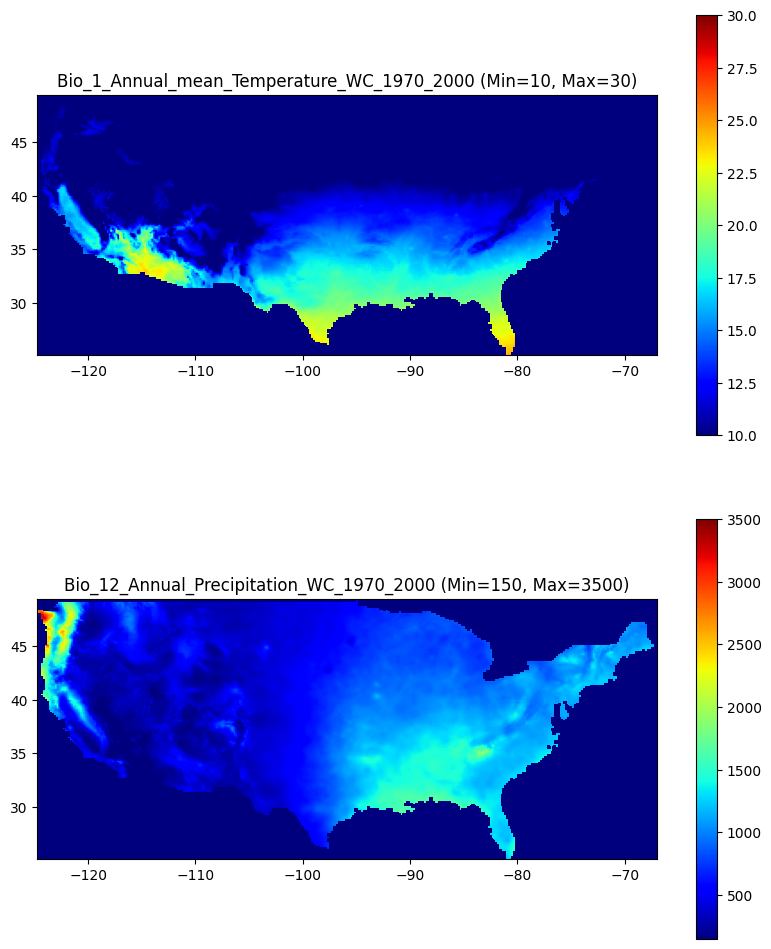

In [ ]:
# Set the figure size for subplot with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the temperature data
im1 = axs[0].imshow(temperature_data, cmap='jet', vmin=min_temperature, vmax=max_temperature, extent=[x_min, x_max, y_min, y_max])
fig.colorbar(im1, ax=axs[0])
axs[0].set_title('Bio_1_Annual_mean_Temperature_WC_1970_2000 (Min={}, Max={})'.format(min_temperature, max_temperature))

# Plot the precipitation data
im2 = axs[1].imshow(precipitation_data, cmap='jet', vmin=min_precipitation, vmax=max_precipitation, extent=[x_min, x_max, y_min, y_max])
fig.colorbar(im2, ax=axs[1])
axs[1].set_title('Bio_12_Annual_Precipitation_WC_1970_2000 (Min={}, Max={})'.format(min_precipitation, max_precipitation))

# Show the plots
plt.show()

In [ ]:
# Normalize the combined_data to range from 0 to 1
combined_data_norm = (combined_data - np.nanmin(combined_data)) / (np.nanmax(combined_data) - np.nanmin(combined_data))


Text(0.5, 1.0, 'Mask_Layer')

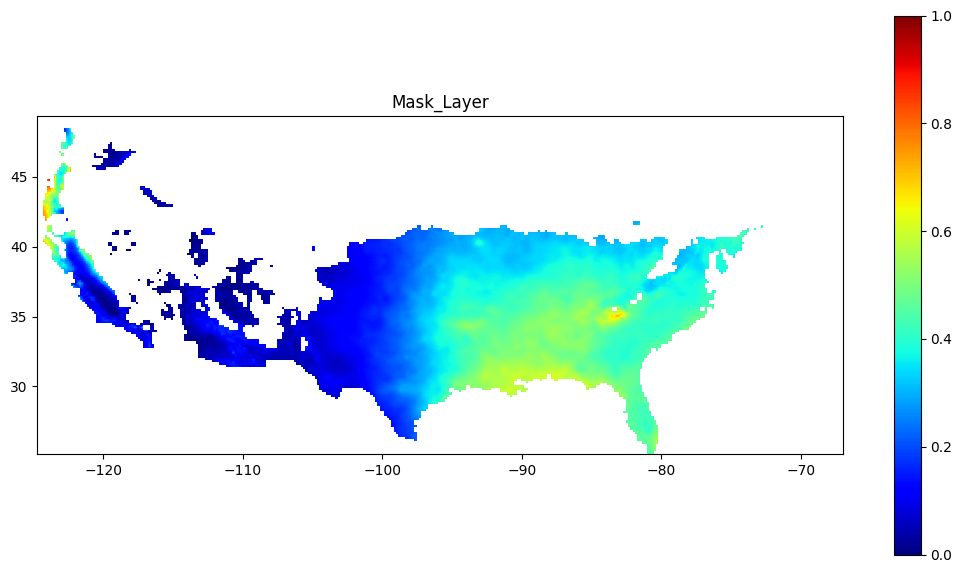

In [ ]:
# Set the figure size
plt.figure(figsize=(13, 7))  # Adjust the width and height as desired

# Plot the combined data with 'jet' colormap and colorbar range from 0 to 1
plt.imshow(combined_data_norm, cmap='jet', vmin=0, vmax=1, extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title('Mask_Layer')

In [ ]:
# Save the plot as a TIFF file
output_file = 'Temperature_and_precipitation.tif'
with rio.open(output_file, 'w', driver='GTiff', width=combined_data_norm.shape[1], height=combined_data_norm.shape[0], count=1, dtype=combined_data_norm.dtype, transform=temperature_dataset.transform, crs=temperature_dataset.crs) as dst:
    dst.write(combined_data_norm, 1)

# Brown_Marmorated_Stink_Bug (1999_2023)

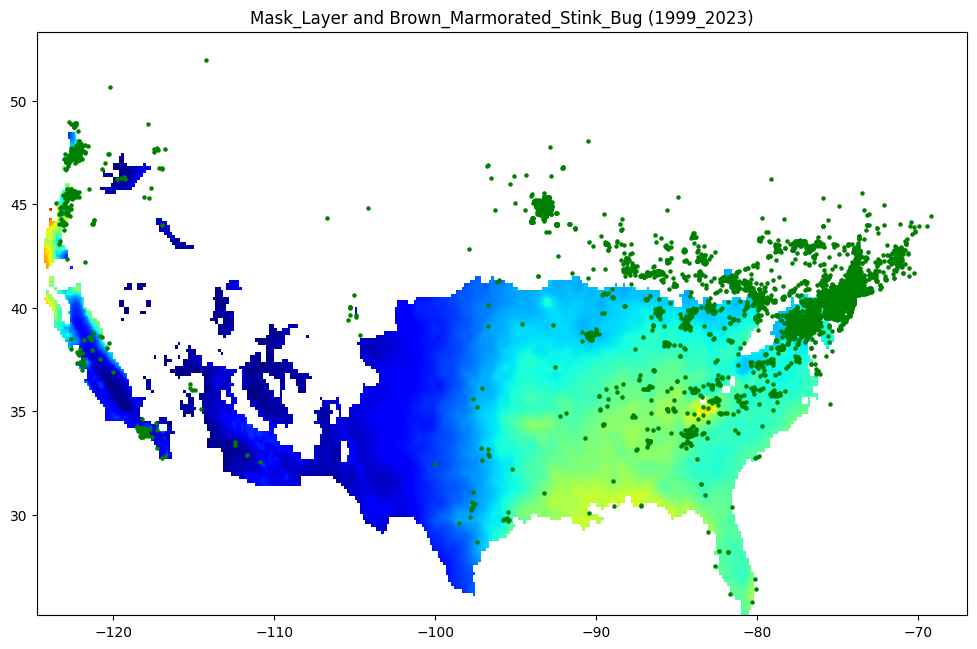

In [ ]:
def plot_species_data(species_data, bioclim_data):
    # Read the species data
    species_df = gpd.read_file(species_data)

    # Read the bioclimatic data
    bioclim_dataset = rio.open(bioclim_data)
    bioclim_data = bioclim_dataset.read(1)

    # Get the geospatial extent of the bioclimatic data
    bounds = bioclim_dataset.bounds

    # Plot the bioclimatic data
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(bioclim_data, cmap='jet', extent=(bounds.left, bounds.right, bounds.bottom, bounds.top))

    # Set the aspect ratio manually
    ax.set_aspect('equal')

    # Plot the filtered species data points
    species_df.plot(ax=ax, markersize=5, color='green')

    # Set the title of the plot
    ax.set_title("Mask_Layer and Brown_Marmorated_Stink_Bug (1999_2023)", fontsize=12)

    # Show the plot
    plt.show()

# Specify the file paths for the species and bioclimatic data
species_data = '/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Halyomorpha_halys(1999_2023).gpkg'
bioclim_data = 'Temperature_and_precipitation.tif'

# Call the plot_species_data function to display the plot
plot_species_data(species_data, bioclim_data)

In [ ]:
import elapid as ela
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [ ]:
species_data = '/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Halyomorpha_halys(1999_2023).gpkg'

In [ ]:
rasters=['Temperature_and_precipitation.tif']

In [ ]:
# read the presence data, draw background point samples
presence = gpd.read_file(species_data)
presence.head()

,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,geometry
0,2001093,Chester Karwatowski Cornell Cooperative Extension,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,04-11-11,01-11-12,...,NaN,NaN,"""blackberry photo uploaded via web form""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-74.28114 41.96179)
1,2001094,Chester Karwatowski Cornell Cooperative Extension,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,04-11-11,01-11-12,...,NaN,NaN,"""blackberry via web upload. samples taken""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-74.10828 42.07733)
2,2278464,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,04-21-12,05-23-12,...,NaN,NaN,"""Had one in house""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92247 41.63886)
3,2278465,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,05-13-12,05-23-12,...,NaN,NaN,"""In livingroom""",11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92251 41.63883)
4,2278466,stewart hanford Whats Invasive,General Public,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,05-07-12,05-23-12,...,NaN,NaN,NaN,11-01-17,Peter Jentsch,Bulk Verified,Verified,Credible,"""Thank you for your submission and image to E...",POINT (-73.92287 41.63884)


In [ ]:
background = ela.sample_raster(bioclim_data, count=10_000)
background.head()

0     POINT (-99.48493 32.81493)
1     POINT (-93.22130 46.68045)
2    POINT (-116.72885 36.34084)
3    POINT (-120.33132 39.76284)
4     POINT (-73.56612 31.53997)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-74.28114 41.96179),1
1,POINT (-74.10828 42.07733),1
2,POINT (-73.92247 41.63886),1
3,POINT (-73.92251 41.63883),1
4,POINT (-73.92287 41.63884),1


In [ ]:
annotated = ela.annotate(merged, bioclim_data, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b1
0,POINT (-74.28114 41.96179),1,NaN
1,POINT (-74.10828 42.07733),1,NaN
2,POINT (-73.92247 41.63886),1,0.390538
3,POINT (-73.92251 41.63883),1,0.390538
4,POINT (-73.92287 41.63884),1,0.390538


In [ ]:
annotated.shape


(23797, 3)

In [ ]:
annotated=annotated.dropna()

In [ ]:
# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MaxentModel(beta_multiplier=2.0)

In [ ]:
 #evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")

Training AUC score: 0.824


In [ ]:
 #write the model predictions to disk
output_raster = 'tempandprecp_brown.tif'
ela.apply_model_to_rasters(model, rasters, output_raster, quiet=True)

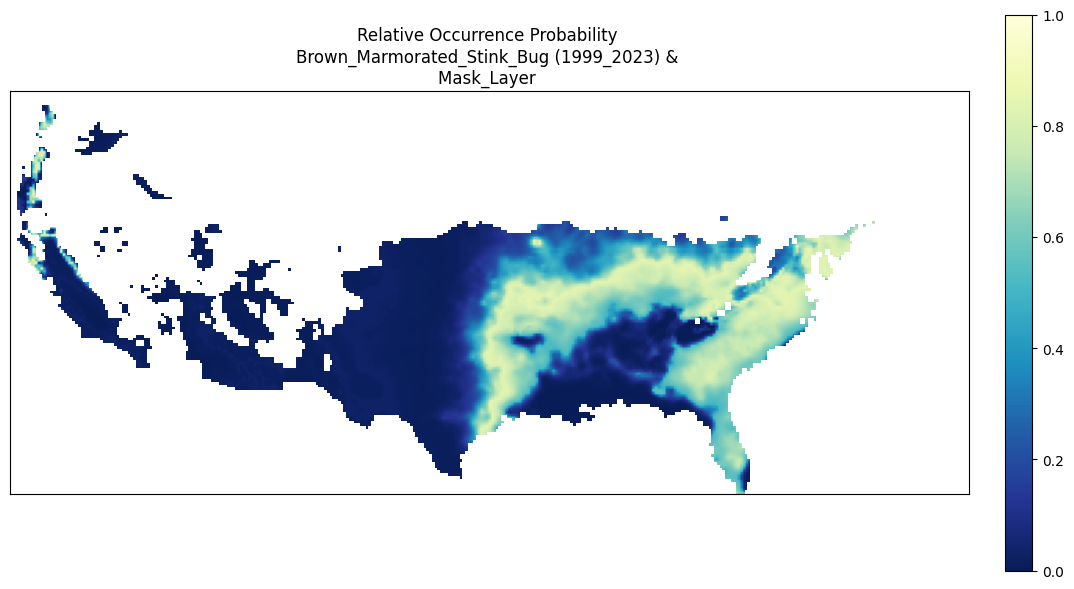

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

import matplotlib.pyplot as plt
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Relative Occurrence Probability \nBrown_Marmorated_Stink_Bug (1999_2023) & \nMask_Layer ')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, pad=0.03)
plt.tight_layout()

# Corn_Earworm (2004-2023)

In [ ]:
species_data2='/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Helicoverpa(2004-2023).gpkg'

In [ ]:
# read the presence data, draw background point samples
presence = gpd.read_file(species_data2)
presence.head()

,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,geometry
0,2483166,Virginia Corn Earworm Monitoring Program Virgi...,State Agency,Helicoverpa zea,"corn earworm, tomato fruitworm",Native,Undetected,Negative,06-07-12,10-26-12,...,NaN,"""Ballahack Rd. (Frank Williams Farm)""","""Nightly blacklight trap catch average for week """,NaN,NaN,NaN,Verified,NaN,NaN,POINT (-76.36332 36.57359)
1,2483167,Virginia Corn Earworm Monitoring Program Virgi...,State Agency,Helicoverpa zea,"corn earworm, tomato fruitworm",Native,Detected,Positive,06-14-12,10-26-12,...,NaN,"""Ballahack Rd. (Frank Williams Farm)""","""Nightly blacklight trap catch average for week """,NaN,NaN,NaN,Verified,NaN,NaN,POINT (-76.36332 36.57359)
2,2483168,Virginia Corn Earworm Monitoring Program Virgi...,State Agency,Helicoverpa zea,"corn earworm, tomato fruitworm",Native,Detected,Positive,06-21-12,10-26-12,...,NaN,"""Ballahack Rd. (Frank Williams Farm)""","""Nightly blacklight trap catch average for week """,NaN,NaN,NaN,Verified,NaN,NaN,POINT (-76.36332 36.57359)
3,2483169,Virginia Corn Earworm Monitoring Program Virgi...,State Agency,Helicoverpa zea,"corn earworm, tomato fruitworm",Native,Detected,Positive,06-28-12,10-26-12,...,NaN,"""Ballahack Rd. (Frank Williams Farm)""","""Nightly blacklight trap catch average for week """,NaN,NaN,NaN,Verified,NaN,NaN,POINT (-76.36332 36.57359)
4,2483170,Virginia Corn Earworm Monitoring Program Virgi...,State Agency,Helicoverpa zea,"corn earworm, tomato fruitworm",Native,Detected,Positive,07-12-12,10-26-12,...,NaN,"""Ballahack Rd. (Frank Williams Farm)""","""Nightly blacklight trap catch average for week """,NaN,NaN,NaN,Verified,NaN,NaN,POINT (-76.36332 36.57359)


In [ ]:
background = ela.sample_raster(bioclim_data, count=10_000)
background.head()

0     POINT (-80.58228 39.91536)
1    POINT (-108.24792 32.09059)
2    POINT (-121.61228 31.66193)
3     POINT (-95.06392 45.98975)
4     POINT (-95.16516 37.32544)
dtype: geometry

In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-76.36332 36.57359),1
1,POINT (-76.36332 36.57359),1
2,POINT (-76.36332 36.57359),1
3,POINT (-76.36332 36.57359),1
4,POINT (-76.36332 36.57359),1


In [ ]:
annotated = ela.annotate(merged, bioclim_data, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b1
0,POINT (-76.36332 36.57359),1,0.434168
1,POINT (-76.36332 36.57359),1,0.434168
2,POINT (-76.36332 36.57359),1,0.434168
3,POINT (-76.36332 36.57359),1,0.434168
4,POINT (-76.36332 36.57359),1,0.434168


In [ ]:
annotated=annotated.dropna()

In [ ]:
# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [ ]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

In [ ]:
 #evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")

In [ ]:
 #write the model predictions to disk
output_raster = 'tempandprecp_helicoverpa.tif'
ela.apply_model_to_rasters(model, rasters, output_raster, quiet=True)

In [ ]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

import matplotlib.pyplot as plt
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Relative Occurrence Probability  \nCorn_EarWorm (2004-2023) & \nMask_Layer')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, pad=0.03)
plt.tight_layout()

# Root Weevil (2012-2023)

In [ ]:
species_data = '/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg'


bioclim_data='Temperature_and_precipitation.tif'

rasters=['Temperature_and_precipitation.tif']

In [ ]:
def plot_species_data(species_data, bioclim_data):
    # Read the species data
    species_df = gpd.read_file(species_data)

    # Read the bioclimatic data
    bioclim_dataset = rio.open(bioclim_data)
    bioclim_data = bioclim_dataset.read(1)

    # Get the geospatial extent of the bioclimatic data
    bounds = bioclim_dataset.bounds

    # Plot the bioclimatic data
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.imshow(bioclim_data, cmap='jet', extent=(bounds.left, bounds.right, bounds.bottom, bounds.top))

    # Set the aspect ratio manually
    ax.set_aspect('equal')

    # Plot the filtered species data points
    species_df.plot(ax=ax, markersize=5, color='green')

    # Set the title of the plot
    ax.set_title("Mask_Layer and Root Weevil(2012-2023)", fontsize=12)

    # Show the plot
    plt.show()

# Specify the file paths for the species and bioclimatic data
species_data = '/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg'

bioclim_data = 'Temperature_and_precipitation.tif'

# Call the plot_species_data function to display the plot
plot_species_data(species_data, bioclim_data)

In [ ]:
# read the presence data, draw background point samples
presence = gpd.read_file(species_data)
presence.head()

background = ela.sample_raster(bioclim_data, count=10_000)
background.head()


In [ ]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

annotated = ela.annotate(merged, bioclim_data, drop_na=True, quiet=True)
annotated.head()

annotated=annotated.dropna()


In [ ]:
# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

 #evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")



In [ ]:
#write the model predictions to disk
output_raster = 'tempandprecp_Rootweevil.tif'
ela.apply_model_to_rasters(model, rasters, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)



In [ ]:
import matplotlib.pyplot as plt
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Relative Occurrence Probability \nRoot_Weevil(2012-2023) & \nMask_Layer ')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax,pad=0.03)
plt.tight_layout()